# Importation des Packages

Nous allons commencer par importer les différentes librairies nécessaires pour ce projet. Ces librairies incluent :

- `numpy` : pour les opérations numériques.
- `matplotlib.pyplot` : pour la visualisation des données.
- `pandas` : pour la manipulation des données.
- `sklearn.cluster` et `sklearn.metrics` : pour le clustering et les métriques d'évaluation.
- `create_dataset` : un module personnalisé pour la création et la normalisation des jeux de données.
- `plot_graphs` : un module personnalisé pour la génération de différents graphiques et visualisations.

Le module `create_dataset` contient deux fonctions principales :
- `createDataFrame` : pour créer un DataFrame à partir de données brutes.
- `normalizeData` : pour normaliser les données du DataFrame.

Le module `plot_graphs` contient plusieurs fonctions pour la visualisation :
- `plotAllForms` : pour tracer toutes les formes de clusters.
- `plot_confusion_matrix` : pour tracer la matrice de confusion.
- `plot_clusters` : pour tracer les clusters.
- `plot_internal_metrics` : pour tracer les métriques internes du clustering.
- `plot_external_and_sse` : pour tracer les métriques externes et l'erreur quadratique moyenne (SSE).


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, jaccard_score
from sklearn.metrics import  recall_score, precision_score, f1_score, classification_report

from create_dataset import createDataFrame, normalizeData
from plot_graphs import plotAllForms, plot_confusion_matrix, plot_clusters, plot_internal_metrics, plot_external_and_sse

# Création et Normalisation des Données

Nous allons créer un jeu de données synthétiques pour nos analyses. Pour ce faire, nous utilisons les fonctions du module `create_dataset` :

- `createDataFrame` : cette fonction génère un DataFrame de formes d'intérets à partir d'un ensemble de points donnés et d'un bruit spécifié.
- `normalizeData` : cette fonction normalise les données du DataFrame pour les préparer à l'analyse.

Dans cette étape, nous définissons un ensemble de 1000 points répartis entre 100 et 300, puis nous générons et normalisons notre DataFrame de formes de series temporelles sur cette intervalle.


In [2]:
N_points = 1000
x = np.linspace(100, 300, N_points)

# Génération du DataFrame à partir des points sans ajout de bruit
df = createDataFrame(x, 0)

# Normalisation des données
df = normalizeData(df)

df.head()


,Form,Class
0,"[-2.41881758907816, -2.4033613357001635, -2.38...",M
1,"[-1.677669449088727, -1.663070230545658, -1.64...",M
2,"[-1.5961409567197964, -1.581777771736999, -1.5...",M
3,"[-2.174487525631039, -2.174487525631039, -2.17...",M
4,"[-2.686721498407874, -2.686721498407874, -2.68...",M


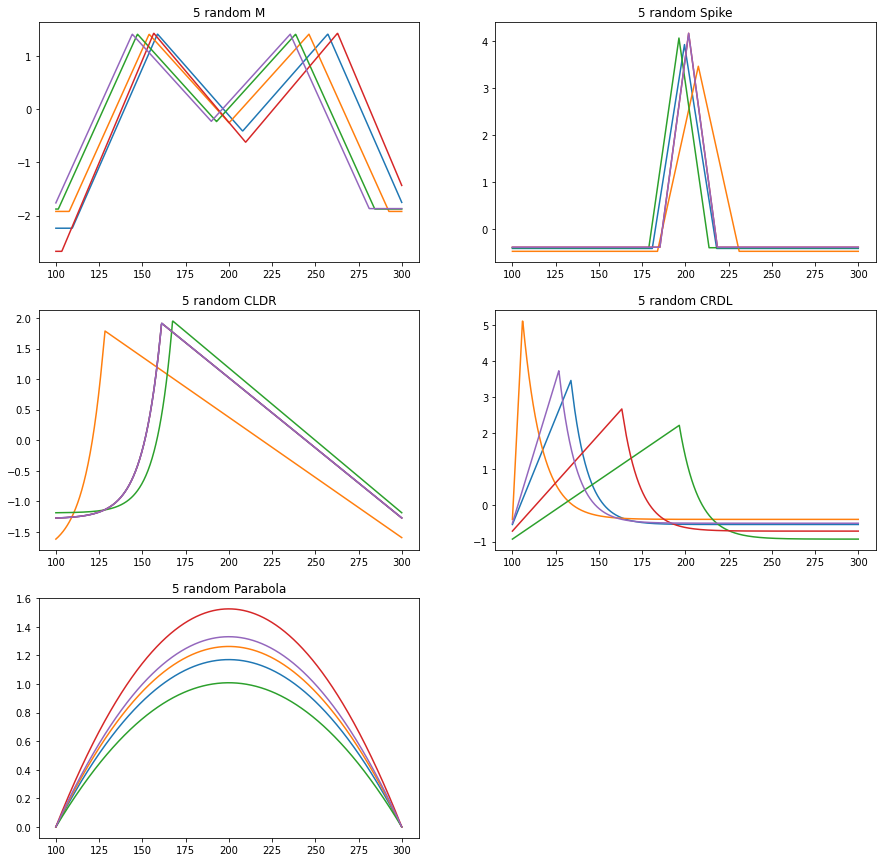

In [4]:
# dessiner les formes pour chaque famille
plotAllForms(df, x)

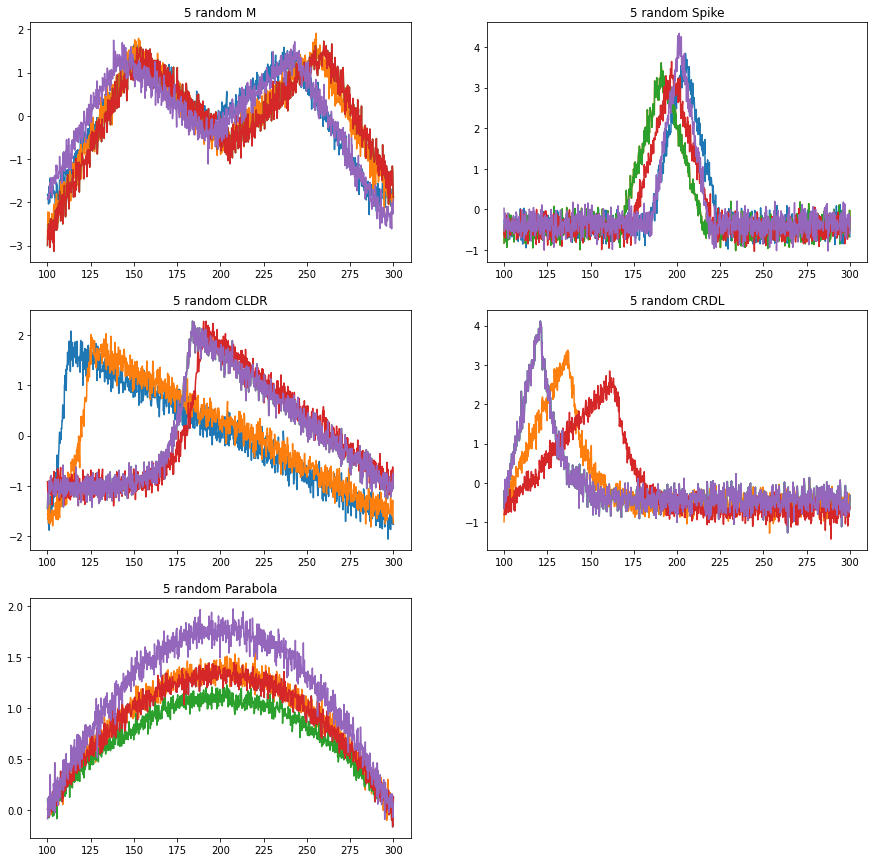

In [3]:
# Ajout de bruit
df_bruit = createDataFrame(x, 0.05)

# Normalisation des données
df_bruit = normalizeData(df_bruit)

# dessiner les formes bruitées pour chaque famille
plotAllForms(df_bruit, x)


# Algorithme de Clustering K-means

Dans cette section, nous allons appliquer l'algorithme de clustering K-means à notre jeu de données. 

L'algorithme K-means partitionne les données en `k` clusters, où chaque observation appartient au cluster (famille de formes).

Nous définissons deux fonctions principales :

- `kmeans_clustering` : cette fonction applique l'algorithme K-means aux données et retourne les labels des clusters ainsi que l'inertie du modèle.
- `replace_clusters_with_classes` : Cette fonction remplace les identifiants de clusters par les noms des classes prédominantes dans chaque cluster.
   - Elle détermine la classe la plus fréquente pour chaque cluster.
   - Elle remplace les identifiants de clusters par les noms de classe correspondants.


In [3]:
def kmeans_clustering(data_frame, k=5):
    """
    Applique l'algorithme de clustering K-means aux données fournies.

    Paramètres:
    data_frame (pd.DataFrame): DataFrame contenant les données à clusteriser.
    k (int): Nombre de clusters pour l'algorithme K-means. Par défaut à 5.

    Retourne:
    np.ndarray: Labels des clusters prédits pour chaque point de données.
    float: Inertie du modèle K-means.
    """
    # Convertir les données de formes pour le clustering
    data_array = np.array(data_frame['Form'].tolist())  # (nombre_points, nombre_de_caracteristiques)

    # Créer et entraîner le modèle K-means
    kmeans = KMeans(k)
    kmeans.fit(data_array)

    data_frame['Predicted Cluster'] = kmeans.labels_

    # Retourner les labels et l'inertie
    return kmeans.labels_, kmeans.inertia_

def replace_clusters_with_classes(data_frame):
    """
    Remplace les identifiants de clusters par les classes prédominantes dans chaque cluster.

    Paramètres:
    data_frame (pd.DataFrame): DataFrame contenant les données et les labels des clusters prédits.

    Retourne:
    pd.DataFrame: DataFrame avec une nouvelle colonne 'Predicted Class' contenant les classes prédominantes.
    """
    # Étape 1: Déterminer la classe la plus fréquente pour chaque cluster
    cluster_to_class = data_frame.groupby('Predicted Cluster')['Class'].agg(lambda x: x.mode()[0]).to_dict()
    
    # Étape 2: Remplacer les identifiants de cluster par des noms de classe
    data_frame['Predicted Class'] = data_frame['Predicted Cluster'].map(cluster_to_class)


### Application de l'Algorithme K-means et Visualisation

Nous allons maintenant appliquer K-means à notre DataFrame normalisé non bruité. Nous fixerons le nombre de clusters à 5. 
Les étapes sont les suivantes :
1. Appliquer l'algorithme K-means avec `k = 5`.
2. Remplacer les clusters par les classes prédominantes.
3. Visualiser les clusters et les classes prédites.


C:\Users\gkemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


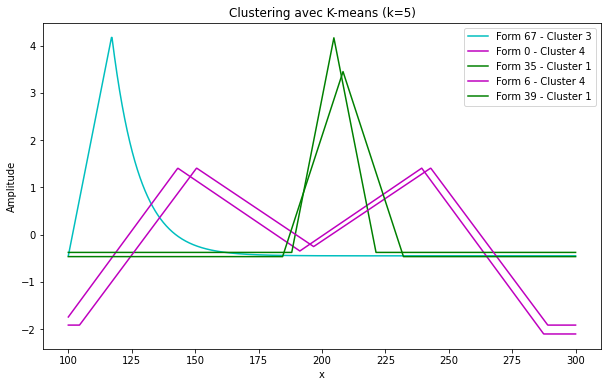

In [6]:
k = 5
labels, inertia = kmeans_clustering(df, k)
replace_clusters_with_classes(df)
plot_clusters(df, x, k, 5)

Les clusters sont bien définis, avec des formes distinctes attribuées à différents clusters. La séparation des clusters est claire et nette.

### K-means sur les Formes Bruitées

Nous appliquons maintenant K-means sur nos données bruitées, suivie de la visualisation des résultats.


C:\Users\gkemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


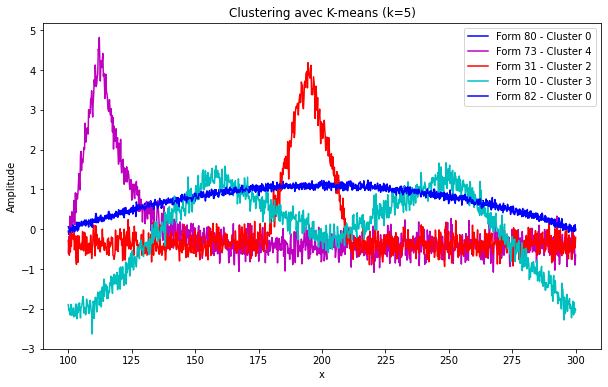

In [17]:
k = 5
labels, inertia = kmeans_clustering(df_bruit, k)
replace_clusters_with_classes(df_bruit)

# Visualisation des clusters et des classes prédites
plot_clusters(df_bruit, x, k, 5)


Les clusters sont moins distincts en raison du bruit. Certaines formes appartenant au même cluster montrent des variations dues au bruit, mais l'algorithme parvient toujours à regrouper les formes similaires ensemble.


# Algorithme de Clustering UK-means

Nous allons implémenter et appliquer un algorithme de clustering appelé UK-means, qui ajuste dynamiquement le nombre de clusters en fonction des données. Contrairement à l'algorithme K-means traditionnel, UK-means n'exige pas de connaître le nombre de clusters (k) à l'avance.

Voici les étapes principales de cet algorithme :
1. Initialisation des paramètres et des centres de clusters.
2. Calcul de l'appartenance des points aux clusters.
3. Mise à jour des paramètres alpha et gamma.
4. Ajustement du nombre de clusters en fonction des nouvelles valeurs de alpha.
5. Mise à jour des centres de clusters.
6. Vérification des critères de convergence.

L'algorithme continue jusqu'à ce que le nombre de clusters soit stable ou qu'une certaine tolérance d'erreur soit atteinte.


In [4]:
def ukmeans_clustering(data_frame, thres=0.1, beta=1, gamma=1, t_max=100):
    """
    Applique un algorithme de clustering UK-means qui ajuste dynamiquement le nombre de clusters.

    Paramètres:
    data_frame (pd.DataFrame): DataFrame contenant les données à clusteriser.
    thres (float): Seuil de convergence pour la mise à jour des centres de clusters.
    beta (float): Paramètre de régularisation pour la mise à jour de alpha.
    gamma (float): Paramètre pour le calcul de l'appartenance.
    t_max (int): Nombre maximal d'itérations pour l'algorithme.

    Retourne:
    np.ndarray: Labels des clusters prédits pour chaque point de données.
    int: Nombre final de clusters.
    """
    points = np.array(data_frame['Form'].tolist())
    points_n = points.shape[0]
    points_dim = points.shape[1]

    # Initialisation des paramètres
    cluster_n = points_n
    clust_cen = points + 0.0001
    alpha = np.ones(cluster_n) * 1 / cluster_n
    err = 10
    rate = 0
    c_history = []

    while cluster_n > 1 and err >= thres and rate < t_max:
        rate += 1

        # Calcul de l'appartenance des points aux clusters
        u = np.zeros((points_n, cluster_n))
        D7 = []
        for k in range(cluster_n):
            D1 = points - clust_cen[k, :]
            D2 = D1 ** 2
            D3 = np.sum(D2, axis=1)
            D4 = D3
            D5 = gamma * np.log(alpha[k])
            D6 = D4 - D5
            D7.append(D6)

        D7 = np.array(D7).T
        if rate == 1:
            D8 = D7.copy()
            np.fill_diagonal(D7, np.nan)
            idx = np.nanargmin(D7, axis=1)
            np.fill_diagonal(D7, np.diag(D8))
        else:
            idx = np.argmin(D7, axis=1)

        for i in range(points_n):
            u[i, idx[i]] = 1

        # Mise à jour de gamma
        gamma = math.exp(-cluster_n / 250)

        # Mise à jour de alpha
        new_alpha = np.sum(u, axis=0) / points_n + beta / gamma * alpha * (np.log(alpha) - np.sum(alpha * np.log(alpha)))

        # Calcul de beta
        a = 1 / rate
        eta = min(1, a ** math.floor(points_dim / 2 - 1))

        temp9 = 0
        for k in range(cluster_n):
            temp8 = math.exp(-eta * points_n * abs(new_alpha[k] - alpha[k]))
            temp9 += temp8
        temp9 = temp9 / cluster_n
        temp10 = 1 - max(np.sum(u, axis=0) / points_n)
        temp11 = np.sum(alpha * np.log(alpha))
        temp12 = temp10 / (-max(alpha) * temp11)

        new_beta = min(temp9, temp12)

        # Mise à jour du nombre de clusters
        index = np.where(new_alpha <= 1 / points_n)

        # Ajustement de alpha
        adj_alpha = np.delete(new_alpha, index)
        adj_alpha = adj_alpha / np.sum(adj_alpha)
        new_alpha = adj_alpha if adj_alpha.size != 1 else alpha

        # Mise à jour du nombre de clusters
        new_cluster_n = new_alpha.size

        # Ajustement de l'appartenance (U)
        adj_u = np.delete(u, index, axis=1)
        adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)
        adj_u[np.isnan(adj_u)] = 0
        new_u = adj_u

        if rate >= 60 and new_cluster_n - cluster_n == 0:
            new_beta = 0

        # Mise à jour des centres de clusters
        new_clust_cen = []
        for k in range(new_cluster_n):
            temp4 = np.zeros(points_dim)
            temp5 = 0
            for i in range(points_n):
                temp4 += new_u[i, k] * points[i, :]
                temp5 += new_u[i, k]
            new_clust_cen.append(temp4 / temp5)
        new_clust_cen = np.array(new_clust_cen)
        new_clust_cen[np.isnan(new_clust_cen)] = np.mean(points)

        # Critères de convergence
        error = np.linalg.norm(new_clust_cen - clust_cen[:new_cluster_n, :], axis=1)
        err = np.max(error)

        clust_cen = new_clust_cen
        cluster_n = new_cluster_n
        alpha = new_alpha
        beta = new_beta
        u = new_u
        c_history.append(cluster_n)

    # Assignation finale des clusters
    clust = np.argmax(u, axis=1)
    return clust, cluster_n


### Application de l'Algorithme de Clustering UK-means et Visualisation

Nous appliquons maintenant notre algorithme de clustering UK-means à notre DataFrame normalisé et visualisons les résultats.


C:\Users\gkemi\AppData\Local\Temp\ipykernel_27820\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


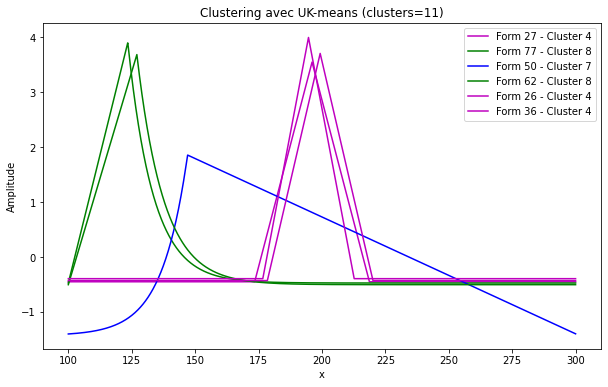

In [22]:
# Application de l'algorithme de clustering UK-means sur les formes non bruitées
labels_ukmeans, cluster_n_ukmeans = ukmeans_clustering(df)

# Ajout des clusters prédits au DataFrame
df['Predicted Cluster'] = labels_ukmeans

# Visualisation des clusters prédits
plot_clusters(df, x, cluster_n_ukmeans, n= 6, ukmeans = True)



L'algorithme UK-means a trouvé un nombre de clusters plus élevé, ce qui permet de capturer plus de détails et de variations parmi les formes. Les clusters sont bien séparés, montrant une capacité à détecter des sous-structures fines dans les données.

### UK-means sur les Formes Bruitées

Nous appliquons maintenant UK-means sur nos données bruitées, suivie de la visualisation des résultats.


C:\Users\gkemi\AppData\Local\Temp\ipykernel_27820\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


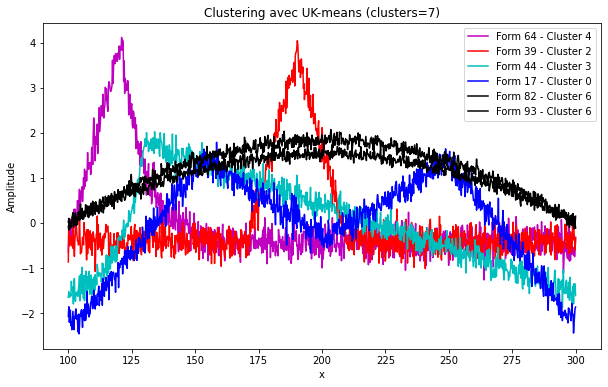

In [41]:
# Application de l'algorithme de clustering UK-means sur les formes non bruitées
labels_ukmeans, cluster_n_ukmeans = ukmeans_clustering(df_bruit)

# Ajout des clusters prédits au DataFrame
df_bruit['Predicted Cluster'] = labels_ukmeans

# Visualisation des clusters prédits
plot_clusters(df_bruit, x, cluster_n_ukmeans, n= 6, ukmeans = True)



Malgré le bruit, l'algorithme UK-means a réussi à identifier 7 clusters distincts. Les clusters montrent une bonne cohérence interne, malgré les variations introduites par le bruit.

# Analyse Détaillée de K-means

Dans cette section, nous allons analyser l'impact de différentes configurations sur l'algorithme K-means. Nous allons varier :
1. Le nombre de points.
2. Le nombre de clusters \( k \).
3. La variance du bruit.

Nous évaluerons les performances à l'aide de métriques internes et externes.


### Calcul des Métriques pour Différentes Valeurs

Nous allons calculer les métriques de performance pour différentes valeurs de \( k \), du nombre de points et de la variance du bruit dans l'algorithme K-means. Les métriques incluent :
- Métriques internes : silhouette, Davies-Bouldin, Calinski-Harabasz.
- Métriques externes : accuracy, precision, recall, F1-score.


- **Métriques Externes** :
  - **Accuracy** : Évalue la proportion de prédictions correctes parmi toutes les prédictions.
  - **Precision** : Mesure la capacité du modèle à ne pas prédire une classe incorrecte.
  - **Recall** : Mesure la capacité du modèle à prédire correctement les classes réelles.
  - **F1 Score** : Moyenne harmonique de la précision et du rappel.
  - **Jaccard Score** : Mesure la similarité entre les ensembles de prédictions et les ensembles réels.

- **Métriques Internes** :
  - **Silhouette Score** : Mesure la cohésion des clusters et la séparation entre eux.
  - **Calinski-Harabasz Index** : Évalue la dispersion des clusters.
  - **Davies-Bouldin Index** : Mesure la moyenne de la similarité entre chaque cluster et son cluster le plus similaire (doit être minimisé).




In [5]:
def calculate_metrics(data_frame, k_range):
    """
    Calcule les métriques de performance pour différentes valeurs de k dans K-means.

    Paramètres:
    data_frame (pd.DataFrame): DataFrame contenant les données à analyser.
    k_range (range): Intervalle de valeurs de k à tester.

    Retourne:
    pd.DataFrame: DataFrame contenant les métriques calculées pour chaque valeur de k.
    """
    metrics = {
        'k_range': k_range,
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'jaccard': [],
        'silhouette': [],
        'calinski_harabasz': [],
        'davies_bouldin': []
    }

    for k in k_range:
        labels, inertia = kmeans_clustering(data_frame, k)
        data_frame['Predicted Cluster'] = labels
        replace_clusters_with_classes(data_frame)

        labels_true = data_frame['Class']
        labels_pred = data_frame['Predicted Class']

        metrics['accuracy'].append(accuracy_score(labels_true, labels_pred))
        metrics['precision'].append(precision_score(labels_true, labels_pred, average='macro'))
        metrics['recall'].append(recall_score(labels_true, labels_pred, average='macro'))
        metrics['f1'].append(f1_score(labels_true, labels_pred, average='macro'))
        metrics['jaccard'].append(jaccard_score(labels_true, labels_pred, average='macro'))
        metrics['silhouette'].append(silhouette_score(data_frame['Form'].tolist(), data_frame['Predicted Cluster']))
        metrics['calinski_harabasz'].append(calinski_harabasz_score(data_frame['Form'].tolist(), data_frame['Predicted Cluster']))
        metrics['davies_bouldin'].append(davies_bouldin_score(data_frame['Form'].tolist(), data_frame['Predicted Cluster']))

    return pd.DataFrame(metrics)

# Définir l'intervalle de k
k_range = range(2, 11)


### Visualisation des Résultats de K-means

Pour mieux comprendre les performances de l'algorithme K-means en fonction du nombre de clusters \( k \), du nombre de formes générées et de la variance du bruit, nous allons visualiser les différentes métriques internes et externes. Cela nous aidera à identifier le nombre optimal de clusters et à analyser la qualité du clustering.

In [6]:
def plot_metrics(metrics, variation='k_range'):
    """
    Trace les métriques de performance de K-means en fonction de la variation spécifiée.

    Paramètres:
    metrics (pd.DataFrame): DataFrame contenant les métriques calculées.
    variation (str): La colonne du DataFrame à utiliser pour l'axe des x.
    """
    variable = metrics[variation]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Tracer les métriques externes
    ax1.plot(variable, metrics['accuracy'], marker='o', color='tab:blue', label='Accuracy')
    ax1.plot(variable, metrics['precision'], marker='o', color='tab:orange', label='Precision')
    ax1.plot(variable, metrics['recall'], marker='o', color='tab:green', label='Recall')
    ax1.plot(variable, metrics['f1'], marker='o', color='tab:red', label='F1')
    ax1.plot(variable, metrics['jaccard'], marker='o', color='tab:purple', label='Jaccard')

    ax1.set_xlabel(variation)
    ax1.set_ylabel('Score')
    ax1.legend(loc='best')
    ax1.grid(True)
    ax1.set_title('External Metrics')

    # Tracer les métriques internes
    ax2.plot(variable, metrics['silhouette'], marker='o', color='tab:red', linestyle='--', label='Silhouette')
    # ax2.plot(variable, metrics['calinski_harabasz'], marker='o', color='tab:green', linestyle='--', label='Calinski-Harabasz')
    ax2.plot(variable, metrics['davies_bouldin'], marker='o', color='tab:orange', linestyle='--', label='Davies-Bouldin')

    ax2.set_xlabel(variation)
    ax2.set_ylabel('Score')
    ax2.legend(loc='best')
    ax2.grid(True)
    ax2.set_title('Internal Metrics')

    fig.suptitle('Metrics for K-means Clustering', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




### Calcul des Métriques pour Différentes Valeurs de k

Nous allons calculer les métriques de performance pour différentes valeurs de \( k \) dans l'algorithme K-means.



In [30]:
%%capture
N_points = 1000
x = np.linspace(100, 300, N_points)

# Génération du DataFrame à partir des points sans ajout de bruit
df = createDataFrame(x, 0,n = 10)

# Normalisation des données
df = normalizeData(df)

# Calcul des métriques pour différentes valeurs de k
metrics = calculate_metrics(df, k_range)


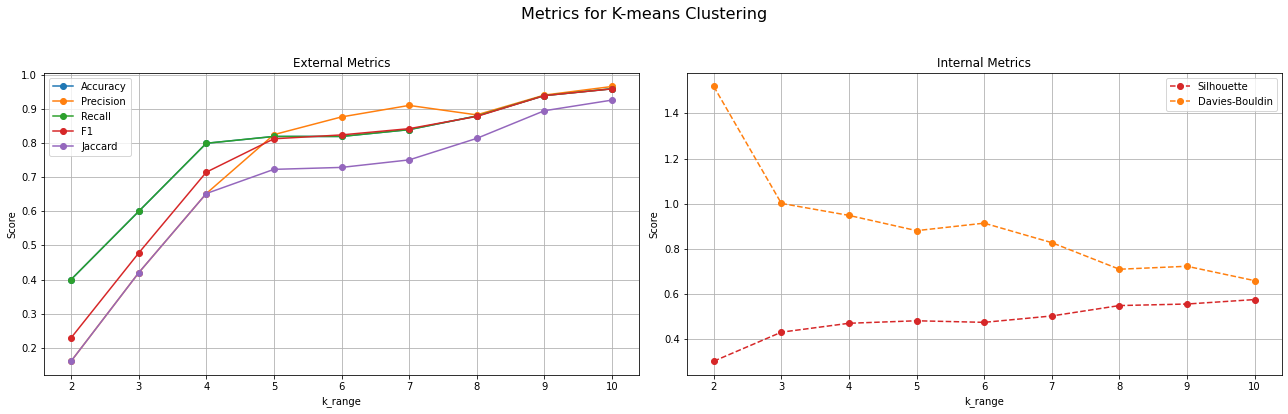

In [31]:
plot_metrics(metrics)

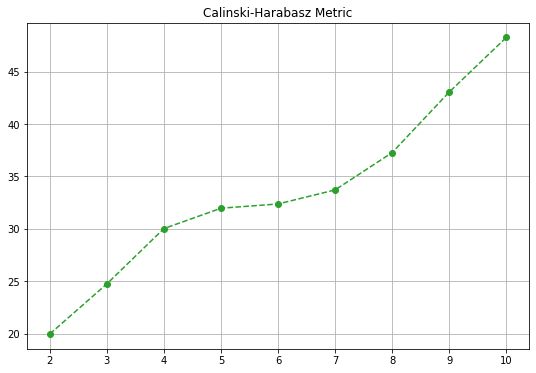

In [35]:
variable = metrics['k_range']
plt.figure(figsize=(9,6))
plt.plot(variable, metrics['calinski_harabasz'], marker='o', color='tab:green', linestyle='--')
plt.title('Calinski-Harabasz Metric')
plt.grid(True)
plt.show()

##### Interprétation des Résultats des Métriques de K-means

##### Métriques Externes
- **Accuracy, Precision, Recall, F1, Jaccard** :
  - Les scores augmentent généralement avec \( k \), atteignant leur maximum à \( k=10 \).
  - Amélioration significative jusqu'à \( k=6 \), puis stabilisation.

##### Métriques Internes
- **Silhouette Score** :
  - Augmente légèrement jusqu'à \( k=5 \), puis se stabilise et diminue légèrement.
- **Davies-Bouldin Index** :
  - Diminue avec \( k \), indiquant une meilleure séparation des clusters.
- **Calinski-Harabasz Index** :
  - Augmente avec \( k \), indiquant une meilleure dispersion des clusters et une séparation plus nette.

##### Interprétation
- **Point de Transition à \( k=5 \)** :
  - Jusqu'à \( k=5 \), ajouter des clusters améliore les scores.
  - Au-delà de \( k=5 \), les gains deviennent marginaux, et les clusters peuvent inclure des points moins bien définis.

##### Conclusion
- **Optimal \( k \)** :
  - \( k=5 \) à \( k=6 \) semble optimal, capturant les structures réelles tout en maintenant une bonne cohésion et séparation des clusters.
  - Au-delà de \( k=6 \), les avantages supplémentaires deviennent moins significatifs.

Pour une application pratique, choisir \( k=5 \) à \( k=6 \) offre un bon équilibre entre précision et complexité du modèle.

**Ceci est cohérent car nous avons généré 5 familles de formes différentes.**





## Analyse avec Variation de la Variance du Bruit

Nous allons analyser l'impact de la variance du bruit sur les performances de K-means avec \( k \) fixé à 5. Nous utiliserons différentes valeurs de variance pour générer les données et observer les résultats.


In [7]:
def calculate_metrics_with_variance(variances, k, kmeans = True):
    """
    Calcule les métriques de performance pour différentes valeurs de variance du bruit avec un nombre de clusters \( k \) fixé.

    Paramètres:
    variances (list): Liste des valeurs de variance du bruit à tester.
    k (int): Nombre de clusters à utiliser pour K-means.
    kmeans (bool): paramètre pour savoir si on fait une classification avec kmeans ou ukmeans
    Retourne:
    pd.DataFrame: DataFrame contenant les métriques calculées pour chaque variance de bruit.
    """
    metrics = {
        'variance': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'jaccard': [],
        'silhouette': [],
        'calinski_harabasz': [],
        'davies_bouldin': []
    }
    cluster_n_ukmeans = []
    for var in variances:
        x = np.linspace(100, 300, 1000)
        df = createDataFrame(x, var, n= 10)
        df = normalizeData(df)
        if kmeans : 
            labels, inertia = kmeans_clustering(df, k)
        else : 
            labels, k_ukmeans = ukmeans_clustering(df)
            cluster_n_ukmeans.append(k_ukmeans)
        df['Predicted Cluster'] = labels
        replace_clusters_with_classes(df)

        labels_true = df['Class']
        labels_pred = df['Predicted Class']

        metrics['variance'].append(var)
        metrics['accuracy'].append(accuracy_score(labels_true, labels_pred))
        metrics['precision'].append(precision_score(labels_true, labels_pred, average='macro'))
        metrics['recall'].append(recall_score(labels_true, labels_pred, average='macro'))
        metrics['f1'].append(f1_score(labels_true, labels_pred, average='macro'))
        metrics['jaccard'].append(jaccard_score(labels_true, labels_pred, average='macro'))
        metrics['silhouette'].append(silhouette_score(df['Form'].tolist(), df['Predicted Cluster']))
        metrics['calinski_harabasz'].append(calinski_harabasz_score(df['Form'].tolist(), df['Predicted Cluster']))
        metrics['davies_bouldin'].append(davies_bouldin_score(df['Form'].tolist(), df['Predicted Cluster']))
    if kmeans :
        return pd.DataFrame(metrics)
    else:
        return pd.DataFrame(metrics), cluster_n_ukmeans



In [59]:
# Définir l'intervalle des variances et fixer k
k = 5
variances = np.linspace(0.01, 0.3, 10)

In [45]:
%%capture
# Calcul des métriques pour différentes valeurs de variance avec k fixé
metrics_variance = calculate_metrics_with_variance( variances, k)


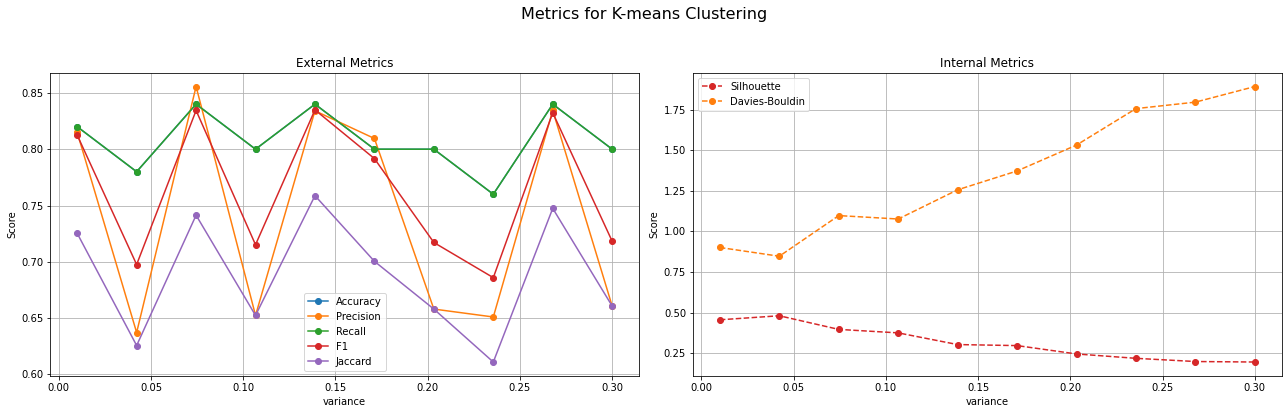

In [46]:
# Visualisation des métriques
plot_metrics(metrics_variance, variation='variance')

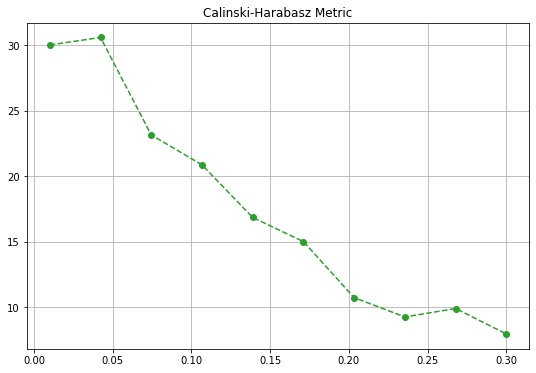

In [47]:
variable = metrics_variance['variance']
plt.figure(figsize=(9,6))
plt.plot(variable, metrics_variance['calinski_harabasz'], marker='o', color='tab:green', linestyle='--')
plt.title('Calinski-Harabasz Metric')
plt.grid(True)
plt.show()

### Interprétation des Résultats des Métriques de K-means en Fonction de la Variance du Bruit

#### Métriques Externes
- **Accuracy, Precision, Recall, F1, Jaccard** :
  - Les scores externes montrent une variabilité avec l'augmentation de la variance.
  - L'accuracy, la précision et le rappel atteignent leur pic autour de 0.3, puis diminuent.
  - Les scores F1 et Jaccard suivent des tendances similaires, atteignant un pic avant de diminuer.

#### Métriques Internes
- **Silhouette Score** :
  - Diminue progressivement avec l'augmentation de la variance, indiquant une cohésion de cluster réduite.
- **Davies-Bouldin Index** :
  - Augmente avec la variance, suggérant une séparation moins nette des clusters.
- **Calinski-Harabasz Index** :
  - Diminue avec l'augmentation de la variance, indiquant une dispersion accrue des clusters et une séparation moins distincte.

### Conclusion
- **Impact de la Variance** :
  - Une faible variance (jusqu'à 0.2) maintient des scores de cohésion et de séparation de clusters acceptables.
  - Une variance plus élevée (>0.3) dégrade les performances de clustering, comme indiqué par la diminution des scores externes et la dégradation des métriques internes.
  
Ces résultats montrent que K-means est sensible à l'augmentation du bruit, ce qui affecte la qualité du clustering. Pour des performances optimales, maintenir une faible variance de bruit est crucial.


# Analyse Détaillée de UK-means

De même que pour K-means, nous allons faire varier la variance pour observer l'impact sur les performances de UK-means. Nous évaluerons les performances à l'aide de métriques internes et externes.


In [57]:
%%capture
# Calcul des métriques pour différentes valeurs de variance avec ukmeans
metrics_variance, nb_clusters = calculate_metrics_with_variance( variances, k, kmeans= False)

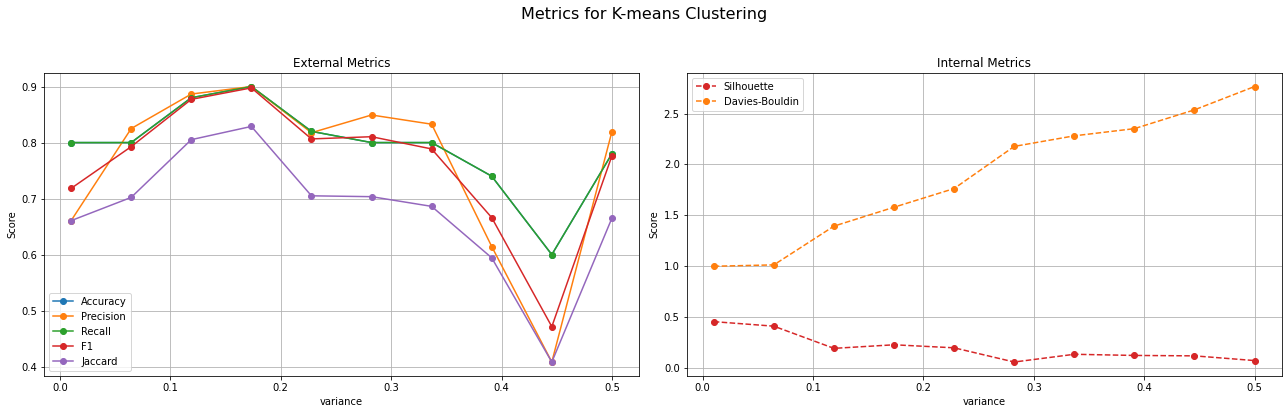

In [60]:
# Visualisation des métriques
plot_metrics(metrics_variance, variation='variance')

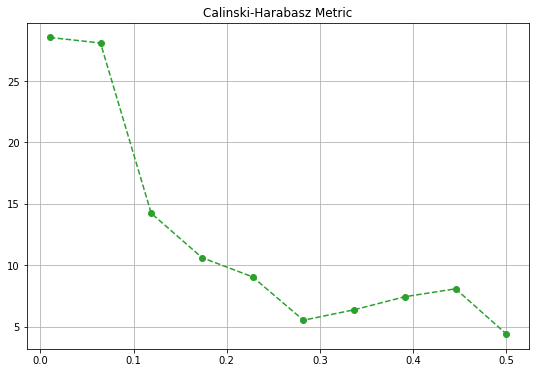

In [61]:
variable = metrics_variance['variance']
plt.figure(figsize=(9,6))
plt.plot(variable, metrics_variance['calinski_harabasz'], marker='o', color='tab:green', linestyle='--')
plt.title('Calinski-Harabasz Metric')
plt.grid(True)
plt.show()

### Interprétation des Résultats des Métriques de UK-means en Fonction de la Variance du Bruit

#### Métriques Externes
- Pic des scores (Accuracy, Precision, Recall, F1, Jaccard) autour du début, puis forte diminution à 0.5.

#### Métriques Internes
- **Silhouette Score** : Diminue avec l'augmentation de la variance.
- **Davies-Bouldin Index** : Augmente avec la variance.
- **Calinski-Harabasz Index** : Diminue jusqu'à 0.1, se stabilise, puis rediminue à 0.5.

### Conclusion
- UK-means fonctionne bien avec une faible variance (jusqu'à 0.2).
- Performances dégradées avec une variance élevée (>0.3).

Maintenir une faible variance de bruit pour des résultats optimaux avec UK-means.


### Influence de la Variance du Bruit sur le Nombre de Clusters Identifiés par UK-means

Dans cette section, nous allons analyser comment la variance du bruit influence le nombre de clusters identifiés par l'algorithme UK-means. Nous allons comparer les résultats obtenus pour différentes valeurs de variance et observer les tendances.


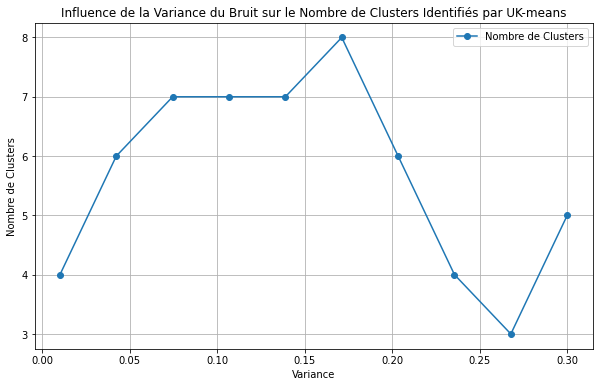

In [63]:
# Visualisation du nombre de clusters en fonction de la variance
plt.figure(figsize=(10, 6))
plt.plot(variances, nb_clusters, marker='o', color='tab:blue', label='Nombre de Clusters')
plt.xlabel('Variance')
plt.ylabel('Nombre de Clusters')
plt.title('Influence de la Variance du Bruit sur le Nombre de Clusters Identifiés par UK-means')
plt.grid(True)
plt.legend()
plt.show()


- Le nombre de clusters augmente avec une faible variance, atteint un pic autour de 0.15, puis diminue fortement au-delà de 0.2.

- **Faible Variance** : Permet à UK-means de détecter plus de sous-structures dans les données.
- **Haute Variance** : Le bruit masque les sous-structures, réduisant le nombre de clusters détectés.


### Analyse avec Variance = 0 (Sans Bruit)


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


,precision,recall,f1-score
CLDR,1.000000,0.85,0.918919
CRDL,0.869565,1.00,0.930233
M,1.000000,1.00,1.000000
Parabola,1.000000,1.00,1.000000
Spike,1.000000,1.00,1.000000


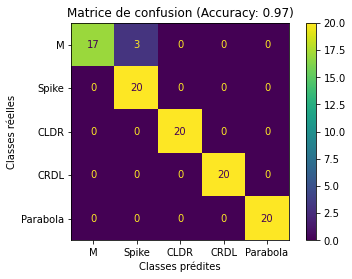

In [17]:
# Générer les données sans bruit
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0)
df = normalizeData(df)

# Appliquer UK-means
labels, nb_clusters = ukmeans_clustering(df)
df['Predicted Cluster'] = labels
replace_clusters_with_classes(df)

# Calculer les métriques
labels_true = df['Class']
labels_pred = df['Predicted Class']

# Générer le rapport de classification
report = classification_report(labels_true, labels_pred, output_dict=True)

# Convertir en DataFrame pour un affichage facile
report_df = pd.DataFrame(report).transpose()
report_df = report_df.iloc[:-3, :-1]  # Supprimer les dernières lignes qui ne sont pas nécessaires

# Afficher les résultats
display(report_df)

# Afficher la matrice de confusion
matrix = confusion_matrix(labels_true, labels_pred)
plot_confusion_matrix(df, matrix)


In [109]:
accuracy = accuracy_score(labels_true, labels_pred)
recall = recall_score(labels_true, labels_pred, average='macro')
precision = precision_score(labels_true, labels_pred, average='macro')
f1 = f1_score(labels_true, labels_pred, average='macro')
jaccard = jaccard_score(labels_true, labels_pred, average='macro')
silhouette = silhouette_score(df['Form'].tolist(), df['Predicted Cluster'])
calinski_harabasz = calinski_harabasz_score(df['Form'].tolist(), df['Predicted Cluster'])
davies_bouldin = davies_bouldin_score(df['Form'].tolist(), df['Predicted Cluster'])

# Afficher les résultats
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Jaccard Score: {jaccard:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")


Accuracy: 0.960
Recall: 0.960
Precision: 0.964
F1 Score: 0.959
Jaccard Score: 0.924
Silhouette Score: 0.464
Calinski-Harabasz Index: 75.105
Davies-Bouldin Index: 0.749


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


### Analyse avec Variance = 0.02 (Bruit Réel)

C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


,precision,recall,f1-score
CLDR,0.75000,0.45,0.562500
CRDL,0.73913,0.85,0.790698
M,1.00000,1.00,1.000000
Parabola,1.00000,1.00,1.000000
Spike,0.80000,1.00,0.888889


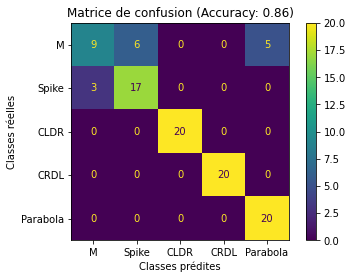

In [21]:
# Générer les données avec variance = 0.02
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0.02)
df = normalizeData(df)

# Appliquer UK-means
labels, nb_clusters = ukmeans_clustering(df)
df['Predicted Cluster'] = labels
replace_clusters_with_classes(df)

# Calculer les métriques
labels_true = df['Class']
labels_pred = df['Predicted Class']

# Générer le rapport de classification
report = classification_report(labels_true, labels_pred, output_dict=True)

# Convertir en DataFrame pour un affichage facile
report_df = pd.DataFrame(report).transpose()
report_df = report_df.iloc[:-3, :-1]  # Supprimer les dernières lignes qui ne sont pas nécessaires

# Afficher les résultats
display(report_df)

# Afficher la matrice de confusion
matrix = confusion_matrix(labels_true, labels_pred)
plot_confusion_matrix(df, matrix)


### Analyse avec Variance = 0.1 (Bruit Élevé)


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


,precision,recall,f1-score
CLDR,0.586207,0.85,0.693878
CRDL,0.866667,0.65,0.742857
M,1.000000,1.00,1.000000
Parabola,1.000000,1.00,1.000000
Spike,0.937500,0.75,0.833333


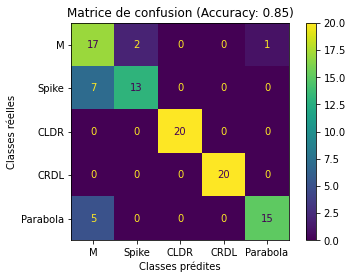

In [25]:
# Générer les données avec variance = 0.05
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0.2)
df = normalizeData(df)

# Appliquer UK-means
labels, nb_clusters = ukmeans_clustering(df)
df['Predicted Cluster'] = labels
replace_clusters_with_classes(df)

# Calculer les métriques
labels_true = df['Class']
labels_pred = df['Predicted Class']

# Générer le rapport de classification
report = classification_report(labels_true, labels_pred, output_dict=True)

# Convertir en DataFrame pour un affichage facile
report_df = pd.DataFrame(report).transpose()
report_df = report_df.iloc[:-3, :-1]  # Supprimer les dernières lignes qui ne sont pas nécessaires

# Afficher les résultats
display(report_df)

# Afficher la matrice de confusion
matrix = confusion_matrix(labels_true, labels_pred)
plot_confusion_matrix(df, matrix)


### Analyse de nombre de classes (k) que ukmeans a trouvé
Nous allons enlever certaines formes du dataset original et observer le nombre de clusters trouvés par UK-means

In [33]:
# Générer les données sans bruit
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0)
df = normalizeData(df)

# Nombre de clusters de base (réel) = 5
nombre_reel_clusters = 5

# Enlever une classe (par exemple, 'Spike')
df_reduced_1 = df[df['Class'] != 'Spike']

# Appliquer UK-means
labels, nb_clusters_1 = ukmeans_clustering(df_reduced_1)

C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


In [34]:
# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés sans la forme 'Spike': {nb_clusters_1}")


Nombre de clusters trouvés sans la forme 'Spike': 7


#### Enlever une forme

In [36]:
# Générer les données sans bruit
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0)
df = normalizeData(df)

# Enlever une classe (par exemple, 'Spike')
df_reduced_1 = df[df['Class'] != 'Spike']

# Appliquer UK-means
labels, nb_clusters_1 = ukmeans_clustering(df_reduced_1)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés sans la forme 'Spike': {nb_clusters_1}")


Nombre de clusters trouvés sans la forme 'Spike': 5


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


#### Enlever deux forme

In [53]:
# Enlever deux classes (par exemple, 'Spike' et 'M')
df_reduced_2 = df[(df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_2 = ukmeans_clustering(df_reduced_2)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés sans les formes : {nb_clusters_2}")


Nombre de clusters trouvés sans les formes 'Spike' et 'M': 3


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


#### Enlever trois formes

In [61]:
# Enlever trois classes (par exemple, 'Spike', 'M' et 'CLDR')
df_reduced_3 = df[(df['Class'] != 'Spike') & (df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_3 = ukmeans_clustering(df_reduced_3)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés sans les formes : {nb_clusters_3}")


Nombre de clusters trouvés sans les formes : 4


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


### Faire la même étude avec ajout du bruit de variance 0.02 (variance réelle)

In [93]:
# Générer les données avec variance = 0.02
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0.02)
df = normalizeData(df)

# Enlever une classe
df_reduced_1 = df[df['Class'] != 'CRDL']

# Appliquer UK-means
labels, nb_clusters_1 = ukmeans_clustering(df_reduced_1)

# Afficher le nombre de clusters trouvés
print(f'Nombre de clusters trouvés: {nb_clusters_1}    Nombre réel : {4}')

# Enlever deux classes 
df_reduced_2 = df[(df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_2 = ukmeans_clustering(df_reduced_2)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés: {nb_clusters_2}   Nombre réel : {3}")

# Enlever trois classes 
df_reduced_3 = df[(df['Class'] != 'Spike') & (df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_3 = ukmeans_clustering(df_reduced_3)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés: {nb_clusters_3}   Nombre réel : {2}")


Nombre de clusters trouvés: 7    Nombre réel : 4
Nombre de clusters trouvés: 3   Nombre réel : 3
Nombre de clusters trouvés: 3   Nombre réel : 2


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)


### Faire la même étude avec ajout du bruit de variance 0.2 (variance forte)

In [97]:
# Générer les données avec variance = 0.2
x = np.linspace(100, 300, 1000)
df = createDataFrame(x, 0.2)
df = normalizeData(df)

# Enlever une classe
df_reduced_1 = df[df['Class'] != 'CRDL']

# Appliquer UK-means
labels, nb_clusters_1 = ukmeans_clustering(df_reduced_1)

# Afficher le nombre de clusters trouvés
print(f'Nombre de clusters trouvés: {nb_clusters_1}    Nombre réel : {4}')

# Enlever deux classes 
df_reduced_2 = df[(df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_2 = ukmeans_clustering(df_reduced_2)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés: {nb_clusters_2}   Nombre réel : {3}")

# Enlever trois classes 
df_reduced_3 = df[(df['Class'] != 'Spike') & (df['Class'] != 'CRDL') & (df['Class'] != 'CLDR')]

# Appliquer UK-means
labels, nb_clusters_3 = ukmeans_clustering(df_reduced_3)

# Afficher le nombre de clusters trouvés
print(f"Nombre de clusters trouvés: {nb_clusters_3}   Nombre réel : {2}")


Nombre de clusters trouvés: 4    Nombre réel : 4
Nombre de clusters trouvés: 3   Nombre réel : 3
Nombre de clusters trouvés: 3   Nombre réel : 2


C:\Users\gkemi\AppData\Local\Temp\ipykernel_11328\3492112922.py:89: RuntimeWarning: invalid value encountered in divide
  adj_u = adj_u / np.sum(adj_u, axis=1, keepdims=True)
